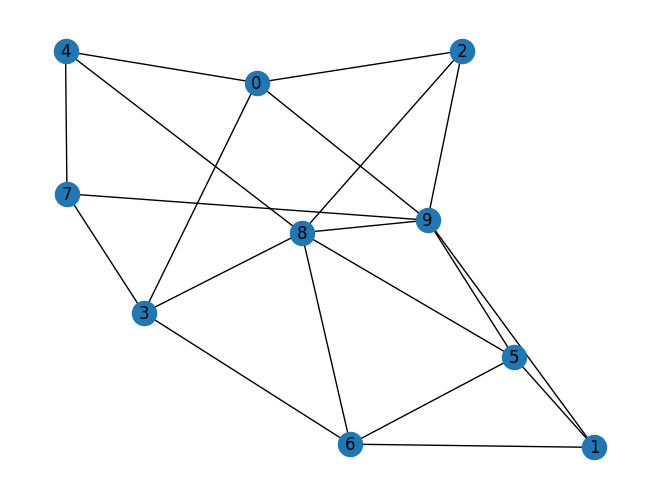

In [62]:
import matplotlib.pyplot as plt
import networkx as nx

K=nx.erdos_renyi_graph(10,0.50)
nx.draw(K, with_labels=True)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('dengue_labels_train.csv')

print("Original Life Expectancy Data:")
print(data)

# Drop any non-numeric columns or choose appropriate columns for clustering
numeric_data = data.drop(['Country', 'Year', 'Status'], axis=1)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Standardize the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

# Perform spectral clustering
n_clusters = 2  
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(numeric_data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = labels

# Display the cluster assignments
print("Clustered Data:")
print(data[['Country', 'Year', 'Cluster']])

# Visualize the clustering results with PCA
plt.scatter(numeric_data_pca[:, 0], numeric_data_pca[:, 1], c=labels, s=50, cmap='cividis')
plt.title('Spectral Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

Spectral Clustering

1. Start with an adjacency matrix of the generated graph

In [63]:
A = nx.to_numpy_array(K)
A

array([[0., 0., 1., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1., 1., 0.]])

2. Establish a diagonal matrix, $D$, which is the sum of the rows:

In [64]:
import numpy as np
D = np.diag(A.sum(axis=1))
D

array([[4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 6., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 6.]])

3. Determine $D^{\frac{-1}{2}} = d_{ii}^{\frac{-1}{2}}$,

In [2]:
from numpy import inf

D_squared = 1/np.sqrt(D)
D_squared[D_squared == inf] = 0
D_squared

NameError: name 'D' is not defined

4. Get the normalized Laplacian graph $L = I_n - D^{\frac{-1}{2}}AD^{\frac{1}{2}}$

In [3]:
I_n = np.identity(10)
L = I_n - np.matmul(np.matmul(D_squared,A),D_squared)
L

NameError: name 'np' is not defined

5. Get the eigenvectors and eigenvalues of the graph Laplacian

In [67]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(L)

In [68]:
eigenvalues

array([-2.77555756e-16,  4.64393113e-01,  1.78184855e+00,  7.15058266e-01,
        8.60287876e-01,  9.74134156e-01,  1.05999526e+00,  1.27791834e+00,
        1.46964747e+00,  1.39671698e+00])

In [69]:
eigenvectors

array([[-0.31622777,  0.36840923,  0.4369838 , -0.23579017, -0.14961392,
         0.34436455, -0.53310152,  0.27871734,  0.11075565, -0.05103063],
       [-0.27386128, -0.45937022,  0.10335124, -0.04386249,  0.3071872 ,
         0.20086535, -0.28961251, -0.4017872 , -0.48371884, -0.29558494],
       [-0.27386128,  0.18212361, -0.18945327, -0.5553913 , -0.27693657,
         0.02546018,  0.17385049, -0.38468771, -0.25043417,  0.47875983],
       [-0.31622777,  0.15040943, -0.39729846,  0.45087162, -0.34282385,
         0.44372465,  0.20476664,  0.19582438, -0.30420364, -0.17032188],
       [-0.27386128,  0.38485006, -0.45379429,  0.20320686,  0.22298363,
        -0.48827854, -0.47410608, -0.12783135,  0.0127452 , -0.0158316 ],
       [-0.31622777, -0.4447016 , -0.06680413, -0.04365507,  0.12666524,
        -0.19798311, -0.06200941,  0.64143731, -0.17584256,  0.44093416],
       [-0.31622777, -0.39180823,  0.01345116,  0.31330975, -0.29950554,
         0.08965994, -0.14767342, -0.34076077

- The second eigenvector of the Laplacian graph provides important information about the graph itself:

- It indicates the best cut of the graph.

- We can create a set of vertices such that $S = {v_i \in V|u_2(v)i)<0}$, followed by $T=V\textbackslash S$, creating two groups, one in set $S$, the other in set $T$.

In [70]:
eigenvectors[:, 1]

array([ 0.36840923, -0.45937022,  0.18212361,  0.15040943,  0.38485006,
       -0.4447016 , -0.39180823,  0.31205825, -0.01799583, -0.01935605])

- Nodes 1,3,4,5 and 8 belongs to the same clusters, while nodes 2, 6, 7, 9 and 10 belongs to another cluster.

Assignment

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

Eigenvector Centrality

- In graph theory, eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

- Eigen

In [73]:
centrality = nx.eigenvector_centrality(K)
centrality

{0: 0.2876355714244018,
 1: 0.253989577831513,
 2: 0.27218265678299575,
 3: 0.29790693027640525,
 4: 0.22415117792508008,
 5: 0.3380170959356353,
 6: 0.3133051686761221,
 7: 0.22356013979379064,
 8: 0.44096454212820196,
 9: 0.4275919020468911}

In [78]:
eigenvalues, eigenvectors = LA.eig(A)

In [79]:
eigenvalues

array([ 4.24785809, -3.13154173,  1.86942436, -1.91573914, -1.56963994,
       -1.        ,  1.08840459, -0.22035826,  0.10610804,  0.52548398])

In [82]:
eigenvectors[:, 0]

array([-0.28763455, -0.25399062, -0.27218211, -0.29790653, -0.22415028,
       -0.33801816, -0.31330612, -0.22355941, -0.4409646 , -0.42759184])

# <font color=red>Eigenvector Centrality Assignment 1</font>

Given the following graph below, find it eigenvector centrality:

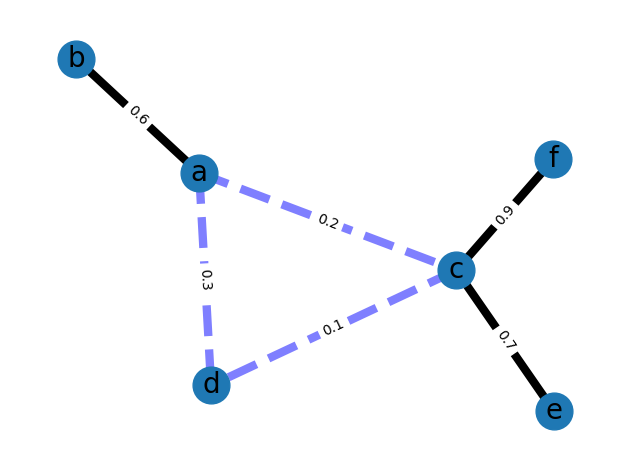

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

<font color=green>**Solution:**</font>

In [4]:
nx.eigenvector_centrality(G)

{'a': 0.51807347662071,
 'b': 0.21182192277183212,
 'c': 0.5986761070959697,
 'd': 0.4566010978754134,
 'e': 0.24477918831750853,
 'f': 0.24477918831750853}

# <font color=red>Assignment 2</font>

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Name of Chosen Data: Russian and Ukrainian Equipment Losses Data

Scope of Collected Data:

Subreddit: AskReddit
Title: Ask Reddit...
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='ShoddySubstance'), Redditor(name='NaziGazpacho'), Redditor(name='Quinthyll'), Redditor(name='HillarysDoubleChin'), Redditor(name='Fushigibama')]


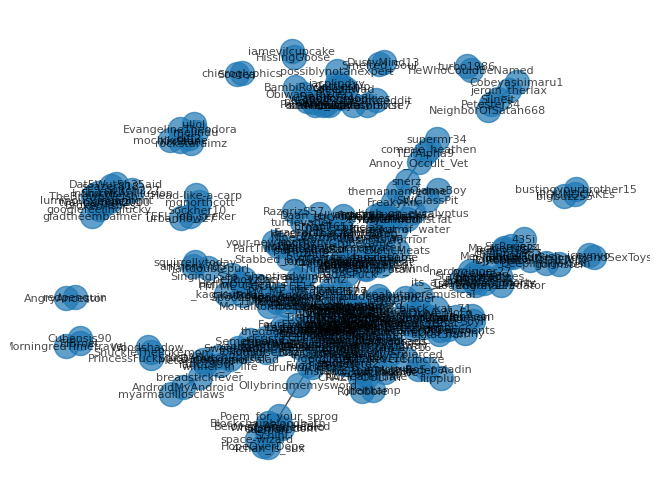

In [21]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id='s_2K_r9RHwzqSRXp-RS3dg',
                        client_secret='hUn5ZH6ddg3n6A4EK2Ie1QKeEIlFDw',
                        user_agent='Zenolitee')

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Skip MoreComments objects
        if isinstance(comment, praw.models.MoreComments):
            continue

        # Check if the comment and parent comment have valid authors
        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  # Set layout algorithm
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

# Choose a subreddit
subreddit_name = "AskReddit"
subreddit = reddit.subreddit(subreddit_name)

# Print subreddit information
print_subreddit_info(subreddit)

# Get the top post from the subreddit
post_id = get_top_post_id(subreddit)

# Create social network graph from comments
social_network = create_social_network(post_id)

# Perform social network analysis
perform_social_network_analysis(social_network)

# Visualize the network
visualize_network(social_network)